# Yolanda Tania Mulyadi / 13318011

In [1]:
import scipy.io
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('dark_background')

## Membuat data sintetik

Data sintetik dibuat dengan menggunakan polinom: $f(x)=5x^3−x^2+x$ dan diberikan noise Gaussian dengan $μ=0$ dan $σ^2=300$

In [3]:
# Meng-generate nilai x
μ = 0
σ = np.sqrt(300)
x = 10*np.random.rand(100)-5
x = x[(x<0) | (x>2)]
x = np.sort(x)

In [4]:
# Meng-generate data y sesuai polinom
y = 5*x**3-x**2+x
y = y + σ * np.random.randn(len(x)) + μ

Text(0.5, 1.0, 'Plot data sintetik f(x)')

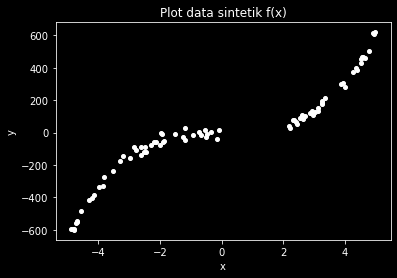

In [5]:
plt.clf()
plt.plot(x,y, 'wo', markersize=4)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot data sintetik f(x)")

## Simulasi Regresi dengan LSQ Approach

In [6]:
#Fungsi mencari nilai w
def do_fit(x,y,orde):
    Ndata = len(x)
    X = np.zeros((Ndata, orde+1))
    X[:,0] = 1.0
    for i in range(Ndata):
        for n in range (1,orde+1):
            X[i,n] = x[i]**n
    XtX = X.transpose()@X
    w = np.linalg.inv(XtX)@X.transpose()@y
    return w

In [7]:
#Fungsi memperbaharui nilai y
def do_predict(w,x):
    Ndata = x.shape[0]
    y = np.ones((1,Ndata))*w[0]
    orde = w.shape[0]-1
    for n in range (1,orde+1):
        y += w[n]*x**n
    return y

In [8]:
Ndata=x.shape[0]
Y_pred = np.zeros((Ndata))
for k in range (1,9):
    loss = 0
    for i in range (Ndata):
        x_val = np.array([x[i]])
        y_val = np.array([y[i]])
        x_train = np.delete(x,i)
        y_train = np.delete(y,i)
        w = do_fit(x_train,y_train,k)
        y_pred = do_predict(w,x_val)
        Y_pred [i] = y_pred

Text(0.5, 1.0, 'Regresi orde 8')

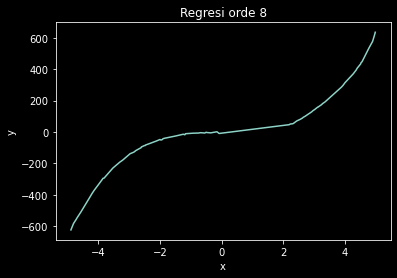

In [9]:
plt.clf()
plt.plot(x,Y_pred)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresi orde 8")

In [10]:
# Membuat data x uji berisi 100 data pada rentang -5 hingga 5
testx = np.linspace(-5,5,100)

## Pendekatan Maximum Likelihood

### Persamaan yang dibutuhkan dalam pendekatan maximum likelihood:


$$w = (X^TX)^{-1}X^Ty$$ <br>
dimana $X$ adalah
$$ X =\begin{bmatrix} 1 & x_1 & {x_1}^2 & .. & {x_1}^k \\ 1 & x_2 & {x_2}^2 & .. & {x_2}^k\\ : & : & : & : & :\\ 1 & x_N & {x_N}^2 & ..& {x_N}^k\end{bmatrix}$$
$k$ = orde persamaan <br>
$N$ = jumlah data x

<br><br>$$ \sigma^2 =  \frac{1}{N_1}(y^Ty - y^TXw) $$
$N_1$ = data x uji (testX)

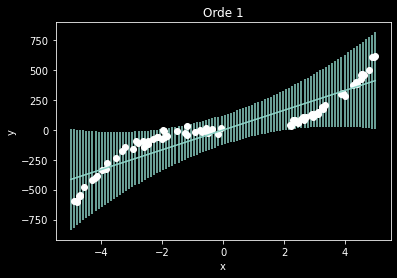

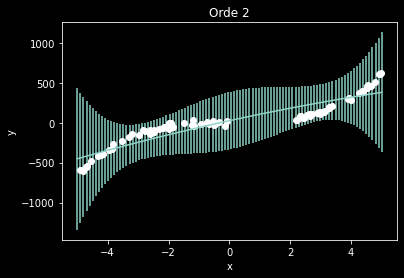

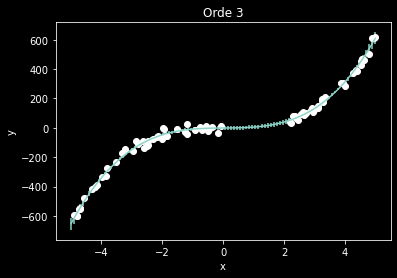

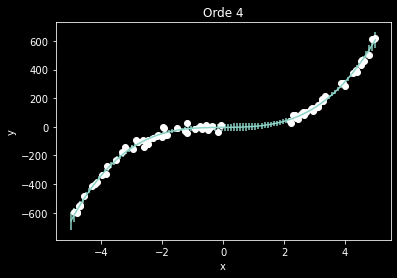

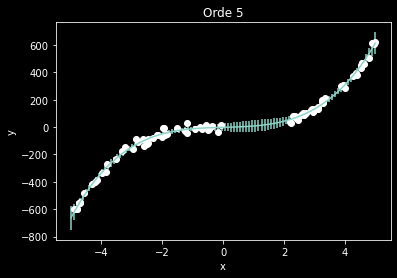

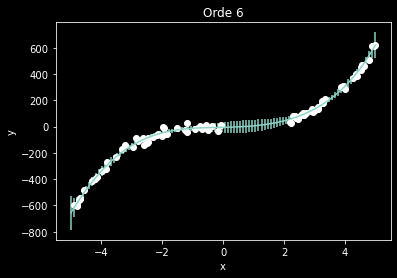

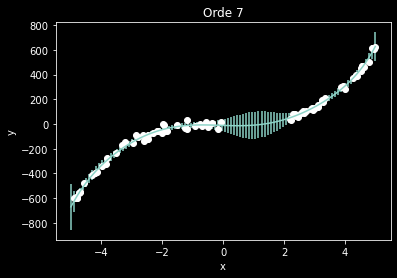

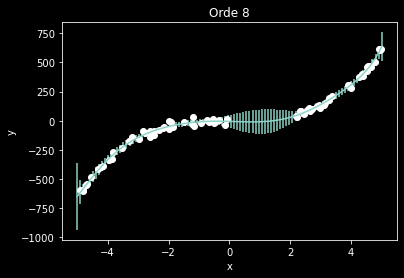

In [11]:
orde = 8
for n in range (1,orde+1):
    X = np.zeros((len(x), n+1))
    testX = np.zeros((len(testx), n+1))
    X[:,0] = 1.0
    testX[:,0] = 1.0
    
    # Menginput matriks X dan testX
    for i in range(Ndata):
        for k in range (1,n+1):
            X[i,k] = x[i]**k
    for i in range(len(testx)):
        for k in range (1,n+1):
            testX[i,k] = testx[i]**k
            
    # Mencari nilai w dan ss
    XtX = X.transpose()@X
    w = np.linalg.inv(XtX)@X.transpose()@y
    ss = 1/len(testx)*(y.transpose()@y - y.transpose()@X@w)
    
    testmean = testX@w
    testvar = ss * np.diag(testX@np.linalg.inv(XtX)@testX.transpose())
    plt.figure()
    plt.plot(x,y,'wo')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.errorbar(testx.flatten(),testmean.flatten(), yerr=testvar.flatten())
    plt.title("Orde " + str(n))